
# Project: Ford GoBike System Data Exploration For May 2020

## By Falebita Oluwatosin

### Table of contents
> * Introduction
> * Data Wrangling
> * Visualization

### Investigation Overview
> This presentation explores a Ford GoBike System dataset containing Bay Wheels's trip data for May 2020. I want to investigate the impact of user type in ford Go biketrip.I am investigating the impact of week day to know the day more trips occur, the equity of each trip based on rideable type?. The number of user that are registered as member or casual for the trip,and how long was the trip based on the day.The main focus on this ford gobike trip are user_type,duration,is_equity and rideable_type


> Research Questions
* 1. What day of the week has the highest number of riders.
* 2. What categories of rider has fair judgement.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopy.distance
%matplotlib inline

In [2]:
#importing dataset for april
bike = pd.read_csv('202005-baywheels-tripdata.csv')

In [3]:
bike.sample(5)

ride_id  rideable_type           started_at  \
117544  B0CCF88E6CB7B466  electric_bike  2020-05-08 19:12:32   
79718   264087624ECA8D8B  electric_bike  2020-05-26 14:53:19   
122082  0F64C618C91A68D2  electric_bike  2020-05-10 11:34:08   
25818   6F60261CB933896E    docked_bike  2020-05-24 15:55:18   
127128  44DB01E99D15C428  electric_bike  2020-05-23 13:30:34   

                   ended_at             start_station_name  start_station_id  \
117544  2020-05-08 19:28:33       Green St at Van Ness Ave             496.0   
79718   2020-05-26 15:06:29                            NaN               NaN   
122082  2020-05-10 12:36:05          Hubbell St at 16th St             345.0   
25818   2020-05-24 16:03:15  The Embarcadero at Sansome St               6.0   
127128  2020-05-23 14:55:16                            NaN               NaN   

                      end_station_name  end_station_id  start_lat  start_lng  \
117544           Post St at Webster St           510.0    37.7977  -122.4234   
79718     4th St at Mission Bay Blvd S            93.0    37.7698  -122.3902   
122082                             NaN             NaN    37.7666  -122.3981   
25818    The Embarcadero at Steuart St            23.0    37.8048  -122.4032   
127128  Valencia St at Cesar Chavez St           141.0    37.7543  -122.4233   

        end_lat   end_lng member_casual  is_equity  
117544  37.7854 -122.4318        casual      False  
79718   37.7701 -122.3913        member      False  
122082  37.7529 -122.5056        casual      False  
25818   37.7915 -122.3910        casual      False  
127128  37.7478 -122.4202        casual      False

## Data wrangling

In [4]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138251 entries, 0 to 138250
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             138251 non-null  object 
 1   rideable_type       138251 non-null  object 
 2   started_at          138251 non-null  object 
 3   ended_at            138251 non-null  object 
 4   start_station_name  87315 non-null   object 
 5   start_station_id    87315 non-null   float64
 6   end_station_name    84779 non-null   object 
 7   end_station_id      84779 non-null   float64
 8   start_lat           138251 non-null  float64
 9   start_lng           138251 non-null  float64
 10  end_lat             138027 non-null  float64
 11  end_lng             138027 non-null  float64
 12  member_casual       138251 non-null  object 
 13  is_equity           138251 non-null  bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 10.2+ MB


In [5]:
# Checking for null values
bike.isnull().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    50936
start_station_id      50936
end_station_name      53472
end_station_id        53472
start_lat                 0
start_lng                 0
end_lat                 224
end_lng                 224
member_casual             0
is_equity                 0
dtype: int64

In [6]:
# high-level overview of data shape and composition
print(bike.shape)
print(bike.dtypes)

(138251, 14)
ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id      float64
end_station_name       object
end_station_id        float64
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
is_equity                bool
dtype: object


* ### Quality issues
> 1. Invalid datatype : started_at, ended_at. 
> 2. Missing values : missing values in start_station_name, start_startion_id, end_station_name, end_station_id, end_lat, end_lng. 
> 3. Rename undescriptive columns

* #### Fixing quality issues

#### Define
> * 1. Invalid dtypes: started_at and ended_at should be timestamp instead of object

#### Code

In [7]:
# Checking the dtype for started_at
bike.started_at, bike.ended_at

(0         2020-05-18 22:16:06
 1         2020-05-19 16:57:35
 2         2020-05-18 20:08:14
 3         2020-05-19 14:05:08
 4         2020-05-10 17:45:54
                  ...         
 138246    2020-05-10 17:26:19
 138247    2020-05-30 17:40:19
 138248    2020-05-31 12:34:41
 138249    2020-05-30 17:27:57
 138250    2020-05-31 13:49:41
 Name: started_at, Length: 138251, dtype: object,
 0         2020-05-18 22:28:20
 1         2020-05-19 17:29:56
 2         2020-05-18 20:14:25
 3         2020-05-19 14:14:16
 4         2020-05-10 18:29:29
                  ...         
 138246    2020-05-10 17:46:18
 138247    2020-05-30 17:47:50
 138248    2020-05-31 14:42:32
 138249    2020-05-30 17:46:56
 138250    2020-05-31 14:10:56
 Name: ended_at, Length: 138251, dtype: object)

In [8]:
bike['started_at'] = pd.to_datetime(bike['started_at'], format='%Y/%m/%d %H:%M:%S.%f')
bike['ended_at'] = pd.to_datetime(bike['ended_at'], format='%Y/%m/%d %H:%M:%S.%f')

#### Test

In [9]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138251 entries, 0 to 138250
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             138251 non-null  object        
 1   rideable_type       138251 non-null  object        
 2   started_at          138251 non-null  datetime64[ns]
 3   ended_at            138251 non-null  datetime64[ns]
 4   start_station_name  87315 non-null   object        
 5   start_station_id    87315 non-null   float64       
 6   end_station_name    84779 non-null   object        
 7   end_station_id      84779 non-null   float64       
 8   start_lat           138251 non-null  float64       
 9   start_lng           138251 non-null  float64       
 10  end_lat             138027 non-null  float64       
 11  end_lng             138027 non-null  float64       
 12  member_casual       138251 non-null  object        
 13  is_equity           138251 no

In [10]:
bike.sample(5)

ride_id  rideable_type          started_at  \
84700   8326AFA5AADBDBC8  electric_bike 2020-05-16 19:18:20   
102957  99329A8DFFA6104C  electric_bike 2020-05-25 13:00:51   
84684   0554CC8F11866DA6  electric_bike 2020-05-03 16:50:46   
18140   706FEDD18D3F5345    docked_bike 2020-05-01 13:51:05   
46481   D3E0CC71E27F86E2    docked_bike 2020-05-02 12:22:26   

                  ended_at                 start_station_name  \
84700  2020-05-16 20:12:58              3rd St at Townsend St   
102957 2020-05-25 13:12:20                                NaN   
84684  2020-05-03 16:59:40                                NaN   
18140  2020-05-01 14:05:38  Brannan St at Colin P Kelly Jr St   
46481  2020-05-02 12:43:27               11th St at Natoma St   

        start_station_id        end_station_name  end_station_id  start_lat  \
84700               66.0   Howard St at Beale St            22.0    37.7789   
102957               NaN                     NaN             NaN    37.7730   
84684                NaN                     NaN             NaN    37.7613   
18140              467.0  15th St at Potrero Ave           101.0    37.7824   
46481               77.0  Broderick St at Oak St            71.0    37.7735   

        start_lng  end_lat   end_lng member_casual  is_equity  
84700   -122.3925  37.7897 -122.3944        member       True  
102957  -122.4394  37.7714 -122.4593        casual      False  
84684   -122.4264  37.7845 -122.4147        member      False  
18140   -122.3913  37.7671 -122.4074        member      False  
46481   -122.4160  37.7731 -122.4391        member      False

#### Define
> * 2. Check and removing Missing data

#### Code

In [11]:
bike.isnull().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    50936
start_station_id      50936
end_station_name      53472
end_station_id        53472
start_lat                 0
start_lng                 0
end_lat                 224
end_lng                 224
member_casual             0
is_equity                 0
dtype: int64

In [12]:
# Dropping missing values
bike.dropna(inplace=True)

* Checking for duplicates

#### Test

In [13]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70895 entries, 8 to 138246
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ride_id             70895 non-null  object        
 1   rideable_type       70895 non-null  object        
 2   started_at          70895 non-null  datetime64[ns]
 3   ended_at            70895 non-null  datetime64[ns]
 4   start_station_name  70895 non-null  object        
 5   start_station_id    70895 non-null  float64       
 6   end_station_name    70895 non-null  object        
 7   end_station_id      70895 non-null  float64       
 8   start_lat           70895 non-null  float64       
 9   start_lng           70895 non-null  float64       
 10  end_lat             70895 non-null  float64       
 11  end_lng             70895 non-null  float64       
 12  member_casual       70895 non-null  object        
 13  is_equity           70895 non-null  bool     

#### Define
> * 3. Rename undescriptive columns

#### Code

In [14]:
bike.rename(columns = {'member_casual' : 'user_type'}, inplace = True)

#### Test

In [15]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70895 entries, 8 to 138246
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ride_id             70895 non-null  object        
 1   rideable_type       70895 non-null  object        
 2   started_at          70895 non-null  datetime64[ns]
 3   ended_at            70895 non-null  datetime64[ns]
 4   start_station_name  70895 non-null  object        
 5   start_station_id    70895 non-null  float64       
 6   end_station_name    70895 non-null  object        
 7   end_station_id      70895 non-null  float64       
 8   start_lat           70895 non-null  float64       
 9   start_lng           70895 non-null  float64       
 10  end_lat             70895 non-null  float64       
 11  end_lng             70895 non-null  float64       
 12  user_type           70895 non-null  object        
 13  is_equity           70895 non-null  bool     

### Tidiness issues 

> * 1. Calculate the distance covered by each rider.
> * 2. Calculate the trip duration
> * 3. Get Start Day and End day for the trips
> * 4. Remove rows where covered distance is equal to zero.
> * 5. Remove rows where duration is equal to zero
> * 6. Drop started_at, ended_at, start_lat, start_lng, end_lat, and end_lng

#### Define
>* 1. Calculate the distance covered by each rider.
> To calculate the distance covered by each rider, install and import geopy and use the start_lat, start_lng, end_lat and end_lng to get distance in kilometers.
> * Reference: https://stackoverflow.com/questions/50402199/error-while-getting-the-distance-between-two-co-ordinates

#### Code

In [16]:
# A function to calculate distance using geopy.
def distancer(row):
    coords_1 = (row['start_lat'], row['start_lng'])
    coords_2 = (row['end_lat'], row['end_lng'])
    return geopy.distance.geodesic(coords_1, coords_2).m
# Add result to a new column
bike['covered_distance'] = bike.apply(distancer, axis=1)

In [17]:
bike['covered_distance']

8         1618.616986
10        1842.899192
18        5188.384797
27        2943.400582
28         690.909747
             ...     
138233    2604.951163
138236    1815.440435
138240    1330.018798
138243    1274.144440
138246    4009.978101
Name: covered_distance, Length: 70895, dtype: float64

#### Test

In [18]:
bike.sample(5)

ride_id  rideable_type          started_at  \
35417   1F344E3707AD4CBA    docked_bike 2020-05-19 17:45:45   
60343   B1BE809F1C0757F1    docked_bike 2020-05-03 14:48:59   
73624   CF6ECB6C65FA91C0    docked_bike 2020-05-21 16:23:49   
20061   C6FA3D5390E532FD    docked_bike 2020-05-28 19:04:27   
130801  91E9AD4C7E58563B  electric_bike 2020-05-31 14:41:30   

                  ended_at                                 start_station_name  \
35417  2020-05-19 18:21:10  San Francisco Ferry Building (Harry Bridges Pl...   
60343  2020-05-03 15:01:44                                 Berry St at 4th St   
73624  2020-05-21 16:43:57                           Telegraph Ave at 23rd St   
20061  2020-05-28 19:15:44                           Post St at Divisadero St   
130801 2020-05-31 14:50:38                              Webster St at Clay St   

        start_station_id          end_station_name  end_station_id  start_lat  \
35417               15.0        Berry St at 4th St            81.0    37.7954   
60343               81.0        Irwin St at 8th St           102.0    37.7759   
73624              180.0  Telegraph Ave at 23rd St           180.0    37.8127   
20061              439.0       Jones St at Post St           370.0    37.7844   
130801             492.0        Hyde St at Post St           369.0    37.7905   

        start_lng  end_lat   end_lng user_type  is_equity  covered_distance  
35417   -122.3942  37.7759 -122.3932    casual      False       2166.144081  
60343   -122.3932  37.7669 -122.3996    member      False       1147.086440  
73624   -122.2688  37.8127 -122.2688    member      False          0.000000  
20061   -122.4395  37.7873 -122.4133    member      False       2330.224067  
130801  -122.4324  37.7876 -122.4167    casual      False       1419.875562

#### Define
>* 2. Calculate the duration of each rider in minutes


#### Code

In [19]:
# Duration in minutes
bike['duration'] = bike['ended_at'] - bike['started_at']
bike['duration']= bike['duration']/np.timedelta64(1,'m')

In [20]:
bike.describe()

start_station_id  end_station_id     start_lat     start_lng  \
count      70895.000000    70895.000000  70895.000000  70895.000000   
mean         221.950716      223.209267     37.766993   -122.372873   
std          167.852998      168.023519      0.093669      0.116820   
min            3.000000        3.000000     37.309000   -122.509100   
25%           73.000000       74.000000     37.767000   -122.426800   
50%          175.000000      176.000000     37.777500   -122.408500   
75%          377.000000      377.000000     37.795300   -122.390400   
max          521.000000      521.000000     37.880200   -121.863700   

            end_lat       end_lng  covered_distance      duration  
count  70895.000000  70895.000000      70895.000000  70895.000000  
mean      37.766871   -122.373271       1809.678539     33.547717  
std        0.093580      0.116857       1574.290157    378.344806  
min       37.309000   -122.509100          0.000000     -0.783333  
25%       37.767000   -122.426700        601.835998      7.816667  
50%       37.777400   -122.408500       1500.046951     14.733333  
75%       37.795400   -122.390600       2713.801389     27.933333  
max       37.880200   -121.863700      17505.542197  34350.250000

#### Define 
> * 3. Get Start Day and End day for the trips

#### Code

In [21]:
bike['start_day'] = bike['started_at'].dt.day_name()
bike['end_day'] = bike['ended_at'].dt.day_name()

In [22]:
bike.sample(20)

ride_id  rideable_type          started_at  \
56318   BC2E2BF597F767CB    docked_bike 2020-05-20 09:06:59   
62655   2AC29991B32074B9    docked_bike 2020-05-27 16:44:36   
37521   4BD0FEAA2E078DF3    docked_bike 2020-05-20 17:48:44   
31516   B2C5EB9AB44C07D7    docked_bike 2020-05-05 18:41:47   
123312  22BD2FEDA6744D39  electric_bike 2020-05-08 13:55:13   
93124   6C9E8FA8534DF2C3  electric_bike 2020-05-02 12:12:19   
59631   2658105FF1BE4045  electric_bike 2020-05-08 17:30:38   
84170   5D19A9D423EA5330    docked_bike 2020-05-24 11:05:03   
10324   E8B58A679F1F9A48  electric_bike 2020-05-10 10:06:02   
103897  76766C1DA7D49542  electric_bike 2020-05-04 15:29:03   
73052   BB10B0112F386A2E    docked_bike 2020-05-26 15:01:12   
97921   A5FB5BCECBCE876A  electric_bike 2020-05-03 16:59:01   
87407   3BE7DE86DF8542C0    docked_bike 2020-05-24 12:08:50   
26580   D0DC911497CDC74A    docked_bike 2020-05-31 08:51:23   
107485  3A1C5C87DEE6BE98  electric_bike 2020-05-09 16:49:20   
31403   64F2BA9A2B8E7D4D    docked_bike 2020-05-30 14:53:24   
98654   F2D5B9EA12CC2714  electric_bike 2020-05-16 12:58:15   
5654    8256A7640AFA510F  electric_bike 2020-05-25 14:58:16   
23043   031D93DD0A462BD0    docked_bike 2020-05-29 22:45:58   
73764   DD28DCF8A887B470  electric_bike 2020-05-12 17:59:27   

                  ended_at                                 start_station_name  \
56318  2020-05-20 09:10:45                               Folsom St at 19th St   
62655  2020-05-27 17:11:35                       Isabella St at San Pablo Ave   
37521  2020-05-20 20:18:06                               Horton St at 40th St   
31516  2020-05-05 19:03:10                              3rd St at Townsend St   
123312 2020-05-08 16:34:50                          Powell St at Columbus Ave   
93124  2020-05-02 12:38:32                                 Hyde St at Post St   
59631  2020-05-08 18:14:35                      Buchanan St at North Point St   
84170  2020-05-24 11:10:08                             Jersey St at Castro St   
10324  2020-05-10 10:19:05                           China Basin St at 3rd St   
103897 2020-05-04 15:52:09       Powell St BART Station (Market St at 4th St)   
73052  2020-05-26 15:29:50  Civic Center/UN Plaza BART Station (Market St ...   
97921  2020-05-03 17:57:18                                 Hyde St at Post St   
87407  2020-05-24 12:34:17                             Grove St at Divisadero   
26580  2020-05-31 09:00:49                          24th St at Chattanooga St   
107485 2020-05-09 17:00:58                             Valencia St at 21st St   
31403  2020-05-30 15:22:55                         Cruise Terminal at Pier 27   
98654  2020-05-16 13:00:10                        O'Farrell St at Masonic Ave   
5654   2020-05-25 15:05:42                                Jones St at Post St   
23043  2020-05-29 22:59:13                           Telegraph Ave at 23rd St   
73764  2020-05-12 18:12:56                            Market St at Steuart St   

        start_station_id                                  end_station_name  \
56318              123.0                              Folsom St at 19th St   
62655              164.0                                21st St at 5th Ave   
37521              148.0                              Horton St at 40th St   
31516               66.0                             Dolores St at 15th St   
123312             487.0                           48th Ave at Cabrillo St   
93124              369.0                             Fell St at Stanyan St   
59631              400.0                           23rd St at Tennessee St   
84170              137.0                            Jersey St at Church St   
10324              364.0                       Pier 1/2 at The Embarcadero   
103897               3.0                            Central Ave at Fell St   
73052               44.0                             Bay St at Fillmore St   
97921              369.0                               

#### Define
> * 4. Remove rows where covered distance is equal to zero

#### Code

In [23]:
bike = bike[bike.covered_distance >= 1]

#### Test

In [24]:
bike.head(20)

ride_id  rideable_type          started_at            ended_at  \
8   574118AD595764A4  electric_bike 2020-05-11 15:28:48 2020-05-11 15:55:37   
10  99701B4330290FD4  electric_bike 2020-05-12 13:44:42 2020-05-12 13:56:21   
18  FE44A098F0CD2744  electric_bike 2020-05-29 07:46:05 2020-05-29 08:03:47   
27  B0084A48F485A95E  electric_bike 2020-05-29 13:47:04 2020-05-29 14:03:50   
28  DFE3D06841F5C565  electric_bike 2020-05-29 09:55:45 2020-05-29 10:19:40   
29  7BD2A5C36CB23CFB  electric_bike 2020-05-28 17:06:05 2020-05-28 17:31:53   
32  5E25A322BCAD696A  electric_bike 2020-05-29 13:42:15 2020-05-29 13:49:11   
34  BE4B575910A269BB  electric_bike 2020-05-29 11:08:49 2020-05-29 11:12:41   
38  42013E1745E18C85  electric_bike 2020-05-29 12:55:55 2020-05-29 13:37:29   
41  1E3ED68FB5D4C56A  electric_bike 2020-05-28 17:15:04 2020-05-28 17:24:25   
53  867879C22359D681  electric_bike 2020-05-16 09:37:12 2020-05-16 09:44:29   
56  5519107A34E47083  electric_bike 2020-05-16 14:17:06 2020-05-16 14:40:12   
58  F45E0DD0F619D7CC  electric_bike 2020-05-16 14:35:35 2020-05-16 15:30:42   
60  88DE4CB9A982487C  electric_bike 2020-05-16 15:33:10 2020-05-16 15:39:40   
64  26FAA83DCCA3FD59  electric_bike 2020-05-16 16:31:05 2020-05-16 16:49:34   
65  3D866B2DBA9C4DBD  electric_bike 2020-05-16 12:11:14 2020-05-16 13:51:23   
66  86A5A2D77C28EDC9  electric_bike 2020-05-16 15:51:14 2020-05-16 15:56:52   
68  9FB474EA2FB64DAA  electric_bike 2020-05-16 11:42:34 2020-05-16 12:17:43   
69  8BB74BD68B09AB22  electric_bike 2020-05-16 16:16:36 2020-05-16 16:30:03   
98  8F72CDF1D689020B  electric_bike 2020-05-22 12:42:07 2020-05-22 13:15:28   

                                   start_station_name  start_station_id  \
8                            Willow St at Blewett Ave             473.0   
10   Montgomery St BART Station (Market St at 2nd St)              21.0   
18                               Market St at 10th St              58.0   
27                                 Hyde St at Post St             369.0   
28                     McAllister St at Arguello Blvd             455.0   
29                           Post St at Divisadero St             439.0   
32       Powell St BART Station (Market St at 4th St)               3.0   
34                        Arguello Blvd at Geary Blvd             456.0   
38                             Grove St at Divisadero              53.0   
41  San Francisco Public Library (Grove St at Hyde...              43.0   
53                                 Hyde St at Post St             369.0   
56                           Funston Ave at Fulton St             485.0   
58                           Market St at Franklin St              75.0   
60             Alamo Square (Steiner St at Fulton St)              54.0   
64                             Grove St at Divisadero              53.0   
65                              Carroll Ave at 3rd St             434.0   
66                           Market St at Franklin St              75.0   
68                           Funston Ave at Irving St             450.0   
69                         Raymond Kimbell Playground              31.0   
98                             Broderick St at Oak St              71.0   

                  end_station_name  end_station_id  start_lat  start_lng  \
8             Palm St at Willow St           300.0    37.3090  -121.9000   
10           Mission Bay Kids Park            92.0    37.7905  -122.4015   
18          17th Ave at Geary Blvd           477.0    37.7769  -122.4174   
27      Laurel St at California St           514.0    37.7876  -122.4166   
28     Arguello Blvd at Geary Blvd           456.0    37.7753  -122.4580   
29          24th St at Bartlett St           386.0    37.7844  -122.4394   
32           Spear St at Folsom St            24.0    37.7862  -122.4052   
34  McAllister St at Arguello Blvd           455.0    37.7815  -122.4588   
38          Broderick St at Oak St            71.0    37.7760  -122.4377   
41              M

#### Define
> * 5. Remove rows where duration is equal to zero

#### Code

In [25]:
bike = bike[bike.duration >= 1]

#### Test

In [26]:
bike.describe()

start_station_id  end_station_id     start_lat     start_lng  \
count      60483.000000    60483.000000  60483.000000  60483.000000   
mean         215.776846      217.302845     37.770717   -122.380300   
std          167.830964      168.092105      0.082418      0.104898   
min            3.000000        3.000000     37.309000   -122.509100   
25%           71.000000       73.000000     37.767000   -122.426800   
50%          148.000000      149.000000     37.777300   -122.410700   
75%          375.000000      377.000000     37.792300   -122.391300   
max          521.000000      521.000000     37.880200   -121.864000   

            end_lat       end_lng  covered_distance      duration  
count  60483.000000  60483.000000      60483.000000  60483.000000  
mean      37.770577   -122.380762       2116.983025     31.579893  
std        0.082309      0.104915       1501.107510    402.401730  
min       37.309000   -122.509100          8.806488      1.000000  
25%       37.767000   -122.426600       1000.072359      8.050000  
50%       37.776800   -122.410800       1789.242746     14.066667  
75%       37.794500   -122.391300       2937.259256     25.100000  
max       37.880200   -121.863700      17505.542197  34350.250000

#### Define
> * 6. Drop started_at, ended_at since I have extracted the duration of the trip and day of the week , and start_lat, start_lng, end_lat, end_lng since i have extracted the distance covered by each rider.

#### Code

In [27]:
bike.drop(['started_at','ended_at','start_lat','start_lng','end_lat','end_lng'], inplace=True, axis=1)

In [28]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60483 entries, 8 to 138246
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ride_id             60483 non-null  object 
 1   rideable_type       60483 non-null  object 
 2   start_station_name  60483 non-null  object 
 3   start_station_id    60483 non-null  float64
 4   end_station_name    60483 non-null  object 
 5   end_station_id      60483 non-null  float64
 6   user_type           60483 non-null  object 
 7   is_equity           60483 non-null  bool   
 8   covered_distance    60483 non-null  float64
 9   duration            60483 non-null  float64
 10  start_day           60483 non-null  object 
 11  end_day             60483 non-null  object 
dtypes: bool(1), float64(4), object(7)
memory usage: 4.0+ MB


### What is the structure of your dataset?

> The Ford GoBike System dataset contains Bay Wheels's trip data for April 2020 with a total of 84259 rows, and 13 columns before cleaning. Afer cleaning the current the dataset contains 43756 rows and 12 columns.

### What is/are the main feature(s) of interest in your dataset?
> The main features of are
* 1. ride_id: Bike ID
* 2. rideable_type :  Bike type
* 3. start_station_name: Start Station Name
* 4. start_station_id: Start Station ID
* 5. end: _station_name: End Station Name
* 6. end_station_id: End Station ID
* 7. is_equity: fairness of the trip judgement
* 8. user_type: User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
* 9. covered_distance: Trip distance in kilometers
* 10. duration: Trip Duration (minutes)
* 11. start_day :  Day of the week the trip started.
* 12. end_day : Day of the week the trip ended.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Since I will be investigating the impact of user type in ford Go biketrip, impact of week day to know the day more trips occur, the equity of each trip based on rideable type?. The number of user that are registered as member or casual for the trip,and how long was the trip based on the day.The following features will support my feature(s) of interest: user_type,duration,is_equity, rideable_type, start_day and end_day

## Univariate Exploration


I'll start by looking at the distribution of the main variable of interest: user_type

In [29]:
#plot of user type
base_color = sns.color_palette()[0]
user_type = bike['user_type'].value_counts().index
sns.countplot(data = bike, x ='user_type',color = base_color, order = user_type)
plt.xlabel('User Type')
plt.ylabel('User Count')
plt.title('Fordgobike Trip User Type Distribution')
plt.show()

In [30]:
bike.user_type.value_counts()

casual    31054
member    29429
Name: user_type, dtype: int64

> Base on the above countplot, the user type with the highest participation in the Fordgobike is the casual type with 31054 riders, while the member type has only 29429 riders.

Now, let's take a look at the Rideable Type

In [31]:
# Rideable Type  plot
base_color = sns.color_palette()[0]
rideable = bike['rideable_type'].value_counts().index
sns.countplot(data = bike, y ='rideable_type',color = base_color, order = rideable)
plt.xlabel('Rideable Type')
plt.ylabel('Frequency')
plt.title('Fordgobike Trip Rideable Distribution')
plt.show()

In [32]:
bike.rideable_type.value_counts()

docked_bike      34694
electric_bike    25789
Name: rideable_type, dtype: int64

> From the above plot we noticed that the most used rideable type for the Fordgobike trip is docked bike with 34694 riders, while electric_bike has just 25789 riders.

Let's explore 3 more features together to minimize code repitition

In [33]:
# let's plot all user_type, start_station_name, end_station_name, is_equity, 
#start_day and end_day together to get an idea of each ordinal variable's distribution.

fig, ax = plt.subplots(nrows=3, figsize = [20,20])

default_color = sns.color_palette()[0]
sns.countplot(data = bike, y = 'start_day', color = default_color, ax = ax[0])
sns.countplot(data = bike, y = 'end_day', color = default_color, ax = ax[1])
sns.countplot(data = bike, y = 'is_equity', color = default_color, ax = ax[2])
plt.show()

>Note the above plot show the frequency of the start_day, end_day and equity. From our plot we can conclude that saturday is the day with the highest trip and there are a large number of false equity in the trip

Now, let's look closely into the distance covered using the values derived from geopy. 

In [34]:
# Distance covered
binsize = 500
bins = np.arange(0, bike['covered_distance'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = bike, x = 'covered_distance', bins = bins)
plt.xlabel('Covered distance (m)')
plt.xlim(0, 20000)
plt.title('Covered Distance Distribution')
plt.ylim();

>The above histogram shows that the distribution skewed and it required scale transformation in order to get a better intepretation relation so that i see the covered_distance impact on forgobike trip.

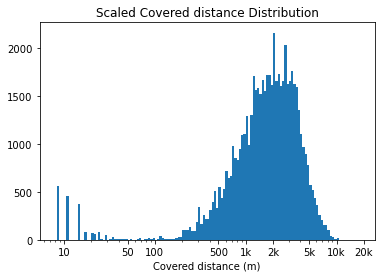

In [35]:
# scale transformation for covered_distance
log_binsize = 0.025
bins = 10 ** np.arange(0.9, np.log10(bike['covered_distance'].max())+log_binsize, log_binsize)
plt.hist(data = bike, x = 'covered_distance', bins = bins)
plt.xscale('log')
plt.xticks([10, 50, 100, 500, 1e3, 2e3, 5e3, 1e4, 2e4],
            [10, 50, 100, 500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('Covered distance (m)')
plt.title('Scaled Covered distance Distribution')
plt.ylim();

In [36]:
np.log10(bike.covered_distance.describe())

count    4.781633
mean     3.325717
std      3.176412
min      0.944803
25%      3.000031
50%      3.252669
75%      3.467942
max      4.243176
Name: covered_distance, dtype: float64

> The log10 value of the covered distance was used for the scale transformation and we can see that the lowest distance covered is about 10 meters while the highest is about 18000 meters

In [37]:
# Distplot for distance covered
sns.distplot(bike['covered_distance']);
plt.title('Distplot Covered distance Distribution')

Text(0.5, 1.0, 'Distplot Covered distance Distribution')

In [38]:
bike.covered_distance.describe()

count    60483.000000
mean      2116.983025
std       1501.107510
min          8.806488
25%       1000.072359
50%       1789.242746
75%       2937.259256
max      17505.542197
Name: covered_distance, dtype: float64

> Distplot for distance covered,the distribution is skewed to the right with a long-tailed distribution having 17505 meters value, which suggest a presence of high outliers.

The next predictor feature is the duration

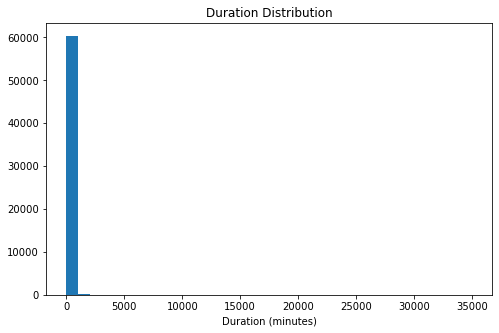

In [39]:
# Histogram for duration
binsize = 1000
bins = np.arange(0, bike['duration'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = bike, x = 'duration', bins = bins)
plt.xlabel('Duration (minutes)')
plt.title('Duration Distribution')
plt.xlim()
plt.ylim();

> To get more information from the duration plot, a scale transformation is required.

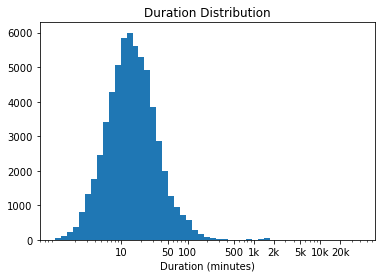

In [40]:
# plotting duration on a standard scale
log_binsize = 0.09
bins = 10 ** np.arange(0, np.log10(bike['duration'].max())+log_binsize, log_binsize)
plt.hist(data = bike, x = 'duration', bins = bins)
plt.xscale('log')
plt.xticks([10, 50, 100, 500, 1e3, 2e3, 5e3, 1e4, 2e4], [10, 50, 100, 500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('Duration (minutes)')
plt.title('Duration Distribution')
plt.ylim();

> The duration of the trip consist of a lot of high outliers and the distribution of the graph is unimodal.

### Checking for outliers

I'm currently at dead end and i couldn't remove high outliers in the covered distance and duration.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> A lot of unusual point was discovered in my exploration, I noticed large distance which occured as a result of incorrect start or end geoloction point and was able to reduce some errors by removing rows where distance covered equals or less than zero. Also, some unusual point was present in the duration due to error in the start and end timestamp and i was able to reduce it by removing some rows with a duration less or equal to zero. I performed some transformation in the plot so that my graph can be self explanatory

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>  I noticed large distance which occured as a result of incorrect start or end geoloction point and was able to reduce some errors by removing rows where distance covered equals or less than zero. Also, some unusual point was present in the duration due to error in the start and end timestamp and i was able to reduce it by removing some rows with a duration less or equal to zero. I did this so that i can reduce the outliers present in the dependent feature. 

## Bivariate Exploration


In [41]:
bike.sample(3)

ride_id  rideable_type       start_station_name  \
94777  61ACD68CA46FC162    docked_bike   Valencia St at 16th St   
84019  0A0D48C4C6DF17B2    docked_bike      Jones St at Post St   
23994  891D7C50887812BD  electric_bike  48th Ave at Cabrillo St   

       start_station_id             end_station_name  end_station_id  \
94777              98.0      Church St at Duboce Ave            85.0   
84019             370.0  Pier 1/2 at The Embarcadero            12.0   
23994             521.0      48th Ave at Cabrillo St           521.0   

      user_type  is_equity  covered_distance   duration start_day   end_day  
94777    casual      False        849.518095  12.416667    Friday    Friday  
84019    casual      False       1932.122822  14.316667  Saturday  Saturday  
23994    member      False         14.170860  47.700000    Monday    Monday

In [42]:
# Grouping columns into numerical and categorical variables
numeric_vars = ['covered_distance', 'duration', 'start_station_id', 'end_station_id']
categoric_vars = ['user_type', 'rideable_type','start_day','end_day', 'is_equity']

### Heat Map
> Plotting heatmap for all quantitative features so as to get their correlation with one another

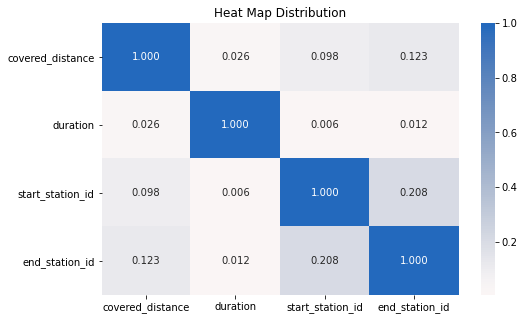

In [43]:
plt.figure(figsize = [8, 5])
sns.heatmap(bike[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Heat Map Distribution')
plt.show()

> The heat map for the quantitative variables provide more insight into the correlation between the variables. These will further be used in supporting my conclusions.

### Pair Grid

> Plotting Pair Grid for all quantitative features to further support the correlation obtained from the heat map.

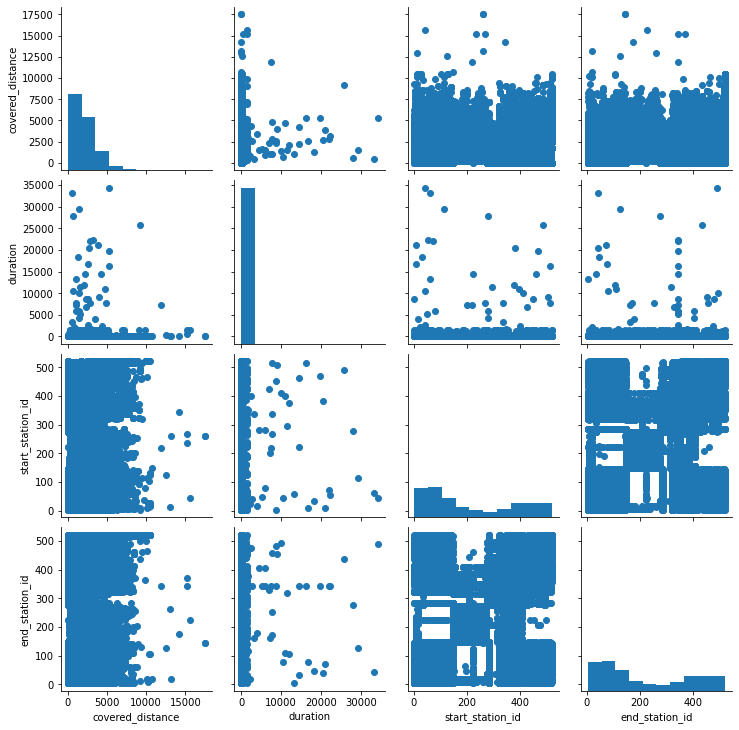

In [44]:
# PairGrid for all quantitative features
plt.figure(figsize = [10, 20]);
plt.title('Pair Grid Distribution')
g = sns.PairGrid(data = bike, vars = ['covered_distance', 'duration', 'start_station_id', 'end_station_id'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);


#### Relationship between quantitative variables
>Checking the relation between duration and covered distance

Text(0.5, 1.0, 'Duration Vs Covered Distance Distribution')

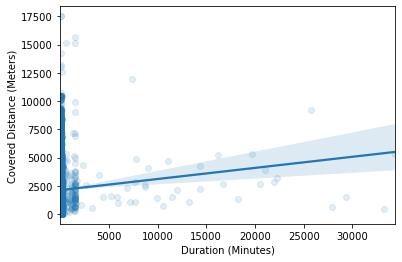

In [45]:
# Using a regression plot
sns.regplot(data = bike, x='duration', y='covered_distance', x_jitter=0.04, scatter_kws={'alpha' : 1/8})
plt.xlabel('Duration (Minutes)')
plt.ylabel('Covered Distance (Meters)');
plt.figure(figsize = [10, 10])
plt.title('Duration Vs Covered Distance Distribution')

>* The about regplot show the relationship between the duration and covered distance, and there is a positve 
correlation between them.

#### Relationship between quantitative variables and qualitative variables 
> Checking the relation between covered distance and user_type

Text(0.5, 1.0, 'Covered distance and User_type')

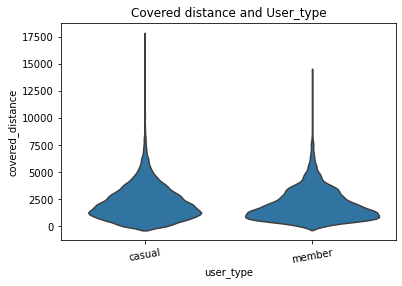

In [46]:
base_color =sns.color_palette()[0]
sns.violinplot(data =bike, y='covered_distance', x='user_type', color=base_color, inner=None);
plt.xticks(rotation =10);
plt.title('Covered distance and User_type')

> From the above violin plot, we can conclude that the casual user covered more distance than the member user.

In [47]:
base_color =sns.color_palette()[0]
sns.violinplot(data =bike, y='covered_distance', x='rideable_type', color=base_color, inner=None);
plt.xticks(rotation =10);
plt.title('Covered distance Vs Rideable Type')

Text(0.5, 1.0, 'Covered distance Vs Rideable Type')

> The above violin plot shows that the docked_bike covers more distance than the electric bike

In [48]:
base_color =sns.color_palette()[0]
sns.violinplot(data =bike, y='duration', x='start_day', color=base_color, inner=None);
plt.xticks(rotation =10);
plt.title('Duration Vs Start Day')

Text(0.5, 1.0, 'Duration Vs Start Day')

> Saturday has the higest count in relation to duration of the trip.

Text(0.5, 1.0, 'Covered distance Vs End day')

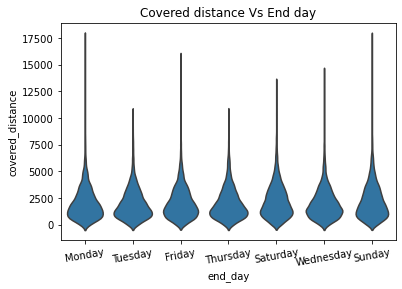

In [49]:
base_color =sns.color_palette()[0]
sns.violinplot(data =bike, y='covered_distance', x='end_day', color=base_color, inner=None);
plt.xticks(rotation =10);
plt.title('Covered distance Vs End day')

> Saturday has the higest count in relation to distance covered of the trip.

#### How duration and covered_distance corelate with the categorical variables

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\axisgrid.py:1259: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


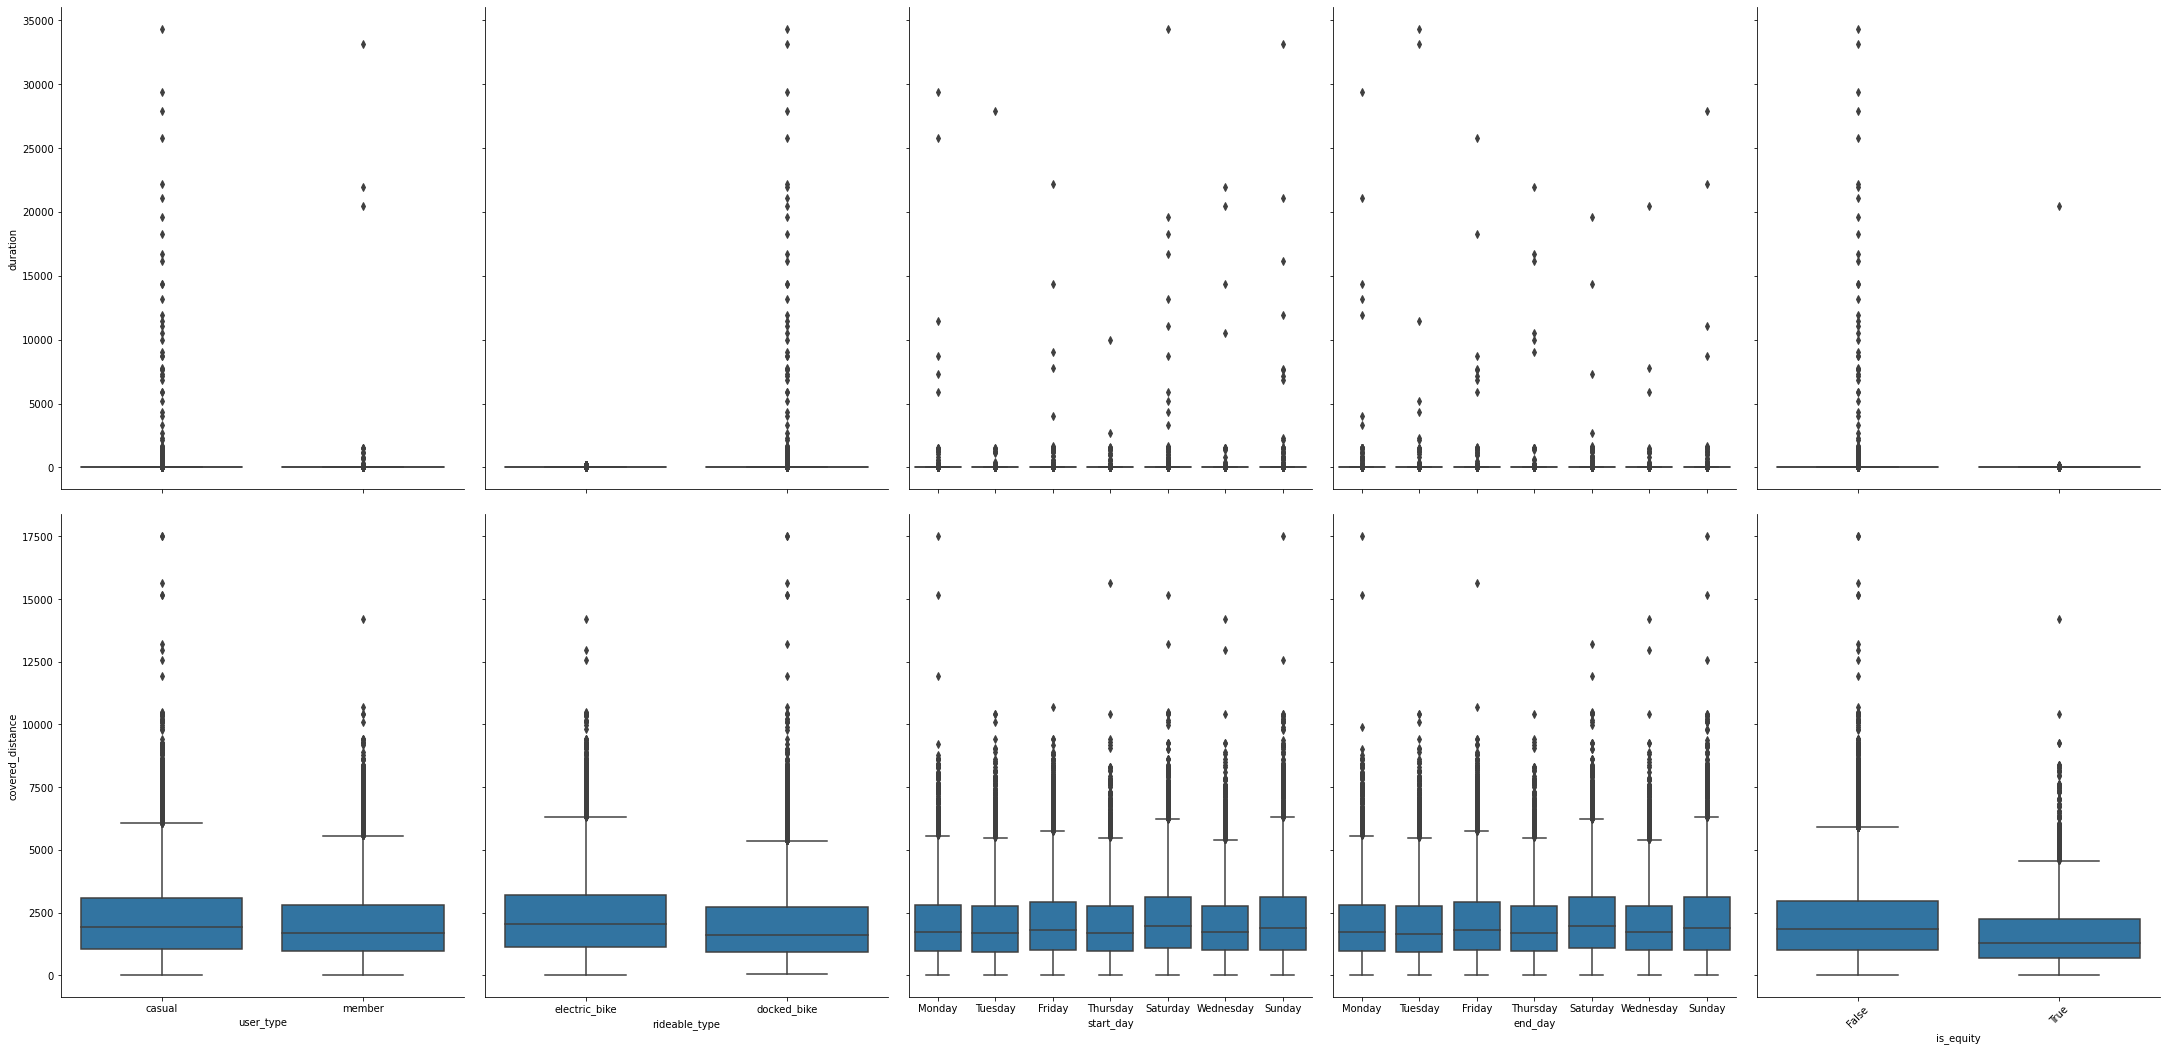

In [50]:
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sns.color_palette()[0]
    sns.boxplot(x, y, color = default_color)


g = sns.PairGrid(data = bike, y_vars = ['duration', 'covered_distance'], x_vars = categoric_vars,
                size = 3, aspect = 1.5)
g.fig.set_size_inches(30,15)
g.map(boxgrid)
plt.xticks(rotation =45);
plt.show();

> Above is a PairGrid for How duration and covered_distance corelate with the categorical variables

#### To reduce code repitition here is a countplot for the relationship between all categorical features
> Relationship between the 5 categorical features

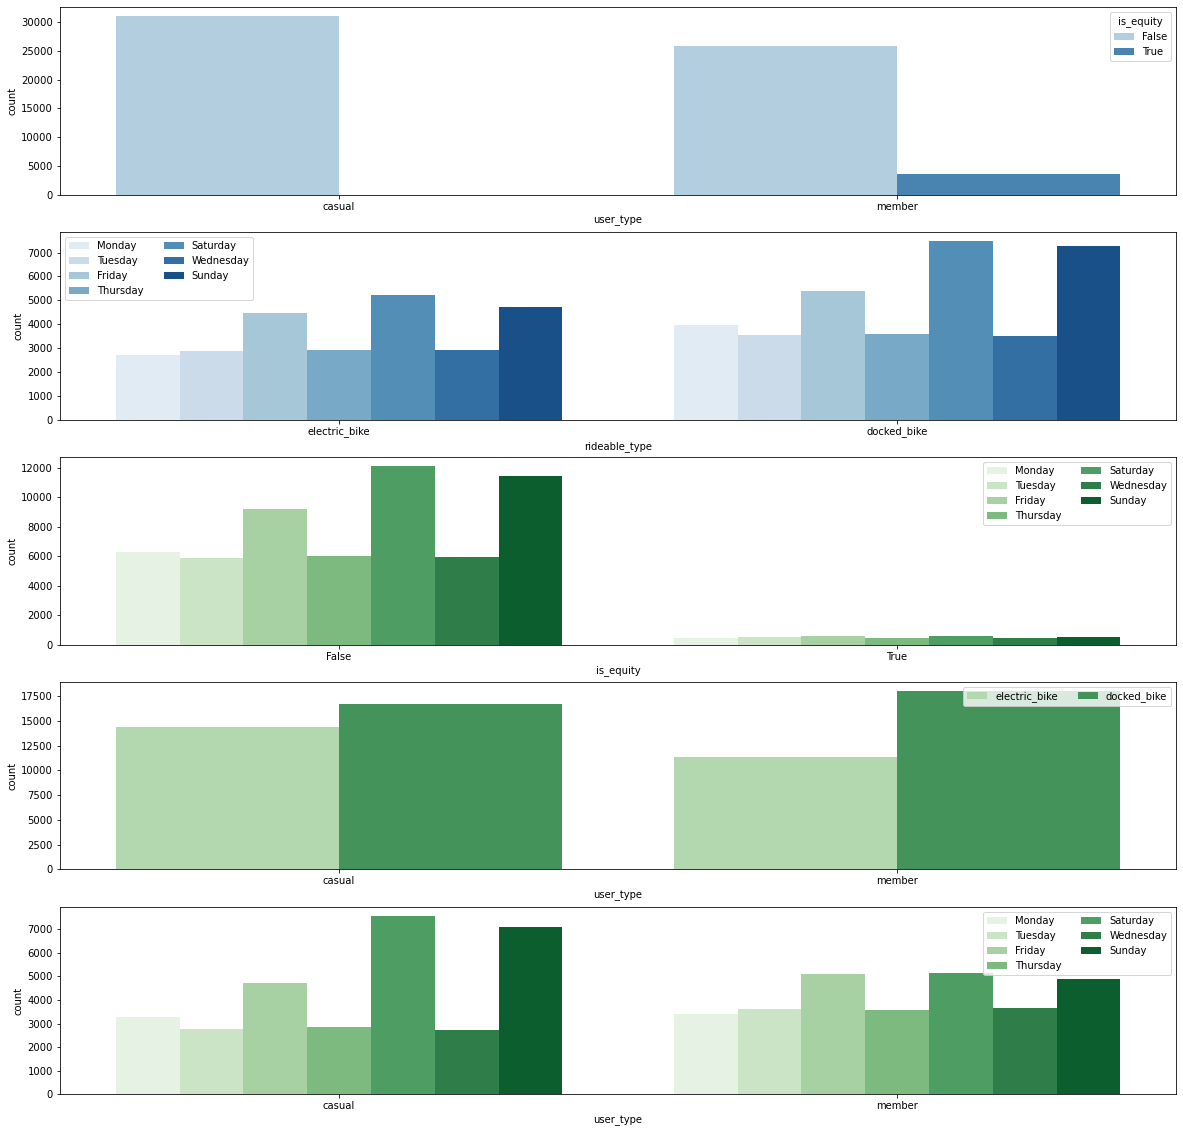

In [51]:
plt.figure(figsize = [20, 20])

# subplot 1: UserType vs IsEquity
plt.subplot(5, 1, 1)
sns.countplot(data = bike, x = 'user_type', hue = 'is_equity', palette = 'Blues')

# subplot 2: Rideable vs. Startday
ax = plt.subplot(5, 1, 2)
sns.countplot(data = bike, x = 'rideable_type', hue = 'start_day', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: IsEquity vs. EndDay, use different color palette
ax = plt.subplot(5, 1, 3)
sns.countplot(data = bike, x = 'is_equity', hue = 'end_day', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping
# subplot 4: UserType vs. RideableType, use different color palette
ax = plt.subplot(5, 1, 4)
sns.countplot(data = bike, x = 'user_type', hue = 'rideable_type', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping
# subplot 5: UserType vs. EndDay, use different color palette
ax = plt.subplot(5, 1, 5)
sns.countplot(data = bike, x = 'user_type', hue = 'end_day', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping



plt.show()

### Multivariate Exploration
The main thing I want to explore in this part of the analysis is how the categorical measures of the dataset play into the relationship between duration and covered.

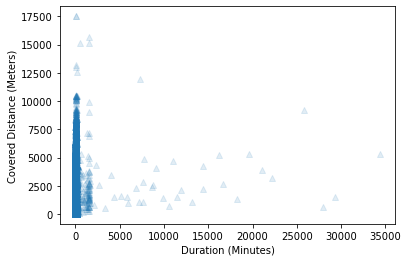

<Figure size 720x720 with 0 Axes>

In [52]:
# # plot the user type variable against duration and covered_distance again, this time
# with full data and variable transforms
ttype_marker = [['member','o'],['casual','^']]
for ttype, marker in ttype_marker:
    plot_data = bike.loc[bike['user_type']==ttype]
sns.regplot(data = plot_data, x='duration', y='covered_distance', x_jitter=0.04, 
            scatter_kws={'alpha' : 1/8}, fit_reg=False, marker = marker )
plt.xlabel('Duration (Minutes)')
plt.ylabel('Covered Distance (Meters)');
plt.figure(figsize = [10, 10]);


> A regplot showing the relationship of user type with the duration and distance covered

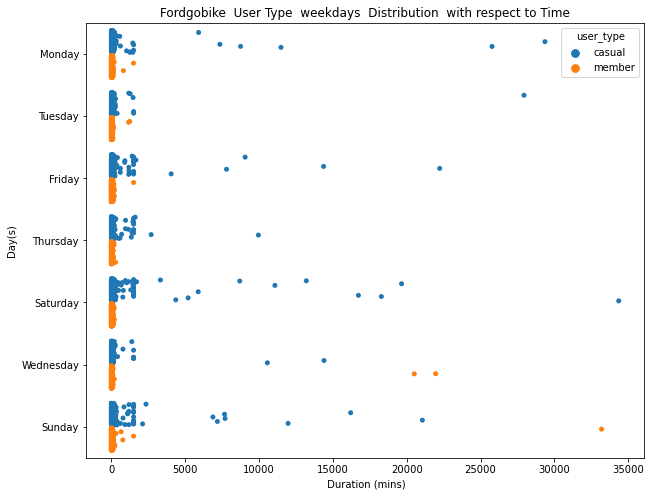

In [53]:
# User Type day 
plt.figure(figsize=[10,8])
sns.stripplot(data = bike, y= 'start_day', x= 'duration', hue = 'user_type',jitter = 0.35, dodge = True)
plt.xlabel(' Duration (mins)')
plt.ylabel('Day(s)')
plt.title('Fordgobike  User Type  weekdays  Distribution  with respect to Time');

> A regplot showing the relationship between fordgobike  UserType, weekdays with respect to Time

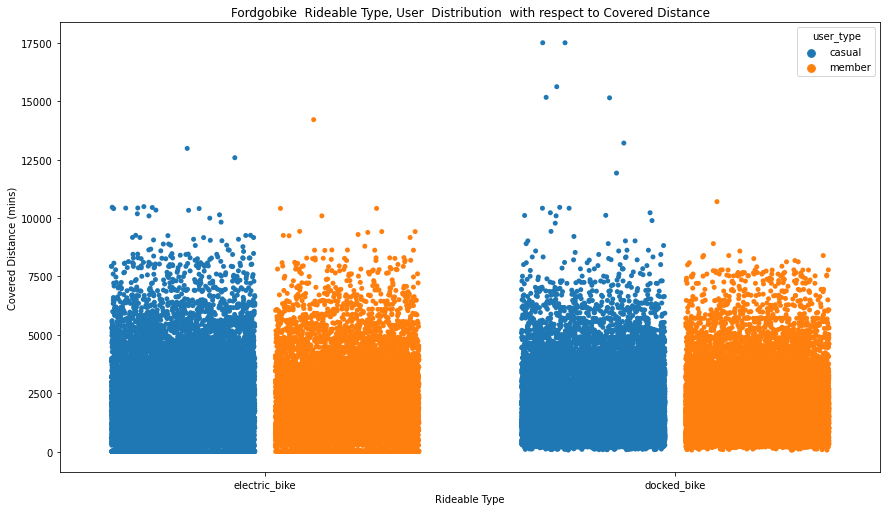

In [54]:
# Rideable Type
plt.figure(figsize=[14.70, 8.27])
sns.stripplot(data = bike, x = 'rideable_type', y = 'covered_distance', hue = 'user_type',jitter = 0.35, dodge = True)
plt.xlabel('Rideable Type')
plt.ylabel('Covered Distance (mins)')
plt.title('Fordgobike  Rideable Type, User  Distribution  with respect to Covered Distance')
plt.show()

> A regplot showing the relationship between fordgobike  UserType, Rideable Type with respect to Distance covered

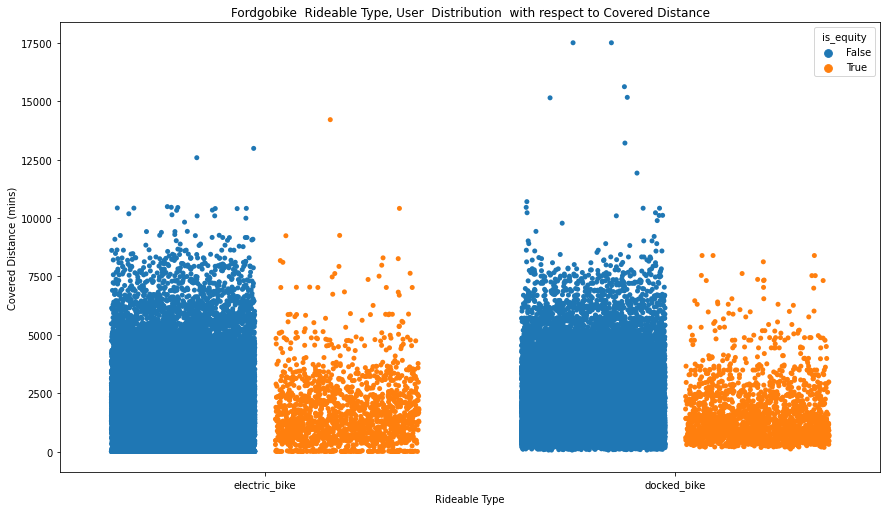

In [55]:
# Rideable Type
plt.figure(figsize=[14.70, 8.27])
sns.stripplot(data = bike, x = 'rideable_type', y = 'covered_distance', hue = 'is_equity',jitter = 0.35, dodge = True)
plt.xlabel('Rideable Type')
plt.ylabel('Covered Distance (mins)')
plt.title('Fordgobike  Rideable Type, User  Distribution  with respect to Covered Distance')
plt.show()

> A regplot showing the relationship between fordgobike  UserType, Rideable Type with respect to Equity

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

#### Quantitative relationship
> Correlation with duration.
The distance covered is a little bit correlated to the duration, while  the start_station_id and end_station_id is not correlated to the duration.
> Correlation with covered distance.
The duration is a little bit correlated to the distance, while  the start_station_id and end_station_id is not correlated to the distance.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Yes there is relationship among other features such has covered_distance and user_type.

## Research Questions

> 1. What day of the week has the highest number of riders.
> 2. What categories of rider has fair judgement.

#### 1. What day of the week has the highest number of riders.

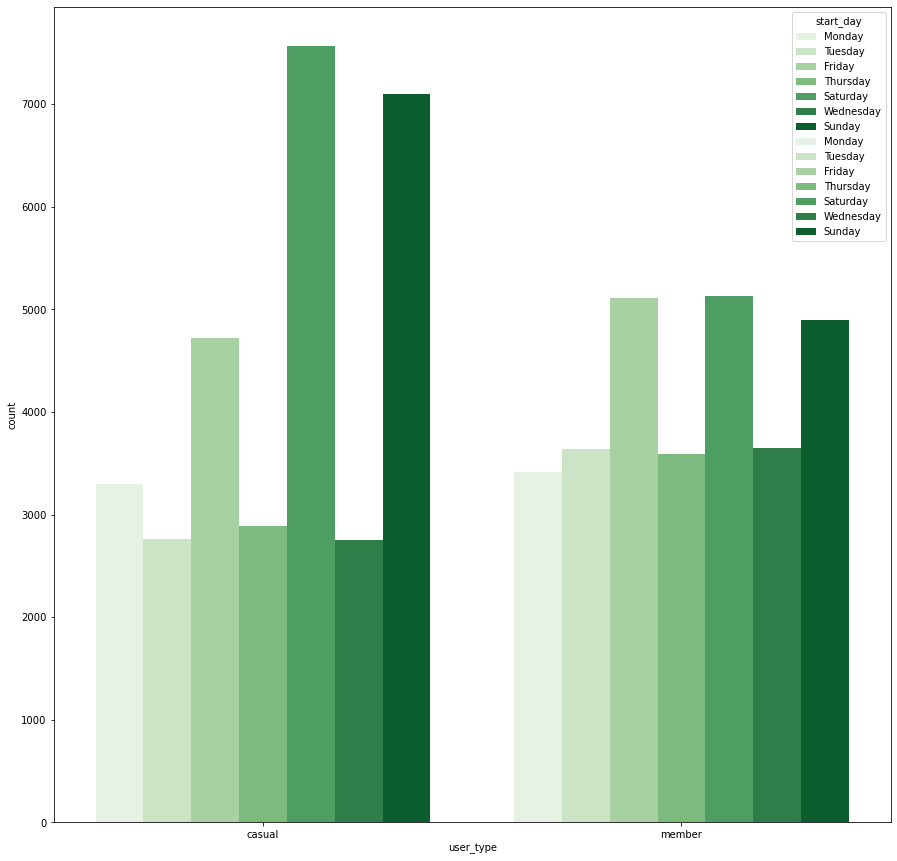

In [56]:
# Countplot for usertype and end_day
plt.figure(figsize = [15, 15])
sns.countplot(data = bike, x = 'user_type', hue = 'end_day', palette = 'Greens')
ax.legend(loc = 1, ncol = 2); # re-arrange legend to remove overlapping

sns.countplot(data = bike, x = 'user_type', hue = 'start_day', palette ='Greens')
ax.legend(loc = 1, ncol = 2); # re-arrange legend to remove overlapping

> * Saturdays and the membership type is casual.

#### 2. What categories of rider has fair judgement.

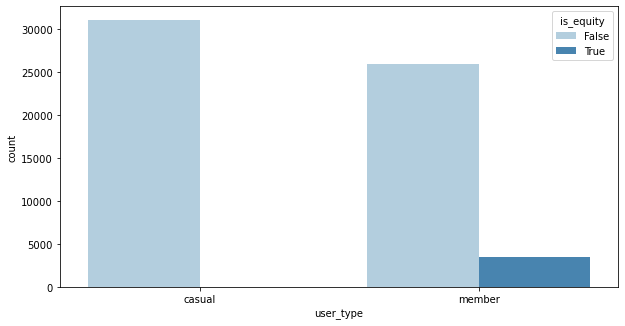

In [57]:
# subplot 1: UserType vs IsEquity
plt.figure(figsize = [10, 30])
plt.subplot(5, 1, 1)
sns.countplot(data = bike, x = 'user_type', hue = 'is_equity', palette = 'Blues');

> * The member categories has the highest record of fair judgement in`the Ford GoBike Trip

### Conclusion
>* The day with the highest number of riders is saturday from both user type.
> * The most prevalent user type with fair judgement is the users that are the real member and not casual member